<a href="https://colab.research.google.com/github/P1nkP1sY/G.231.22.0006_Deannys-Anugerah-F/blob/main/UAS_PRAKTIKUM_DATA_MINING_G_231_22_0006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning Random Forest**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRAYpI4zlM8U4TtRzFUCDSYOQdWRK88fAZgzCtrkcOGZmYczjiFI5OlAFCcqaHWBISTcjciVzCHx217/pub?output=csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])

In [ ]:
x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=df['weather']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.47       293
weighted avg       0.84      0.83      0.78       293



In [ ]:
df.loc[:,['date','temp_max']]
df['date'] = pd.to_datetime(df['date'])

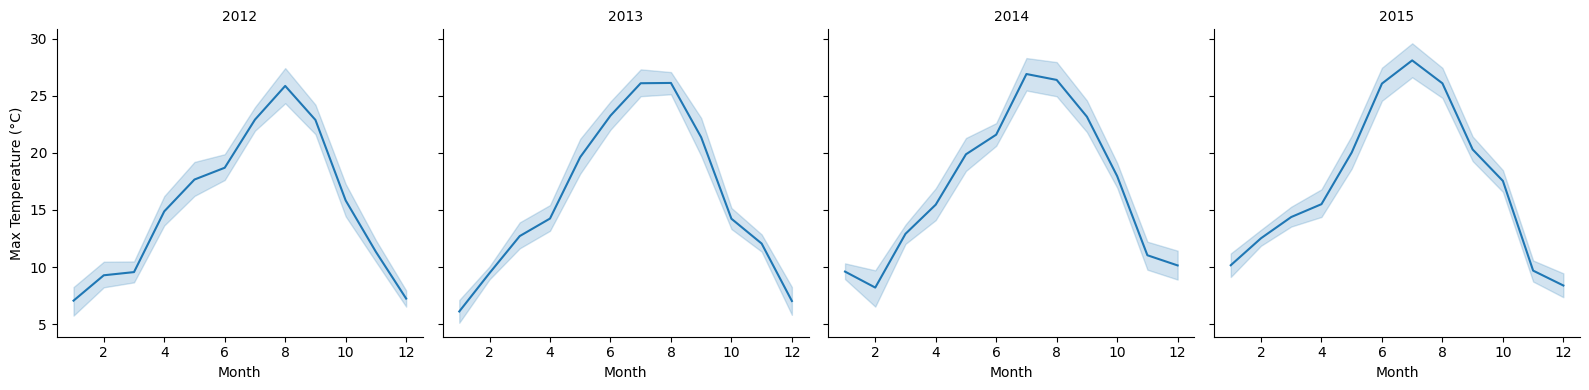

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

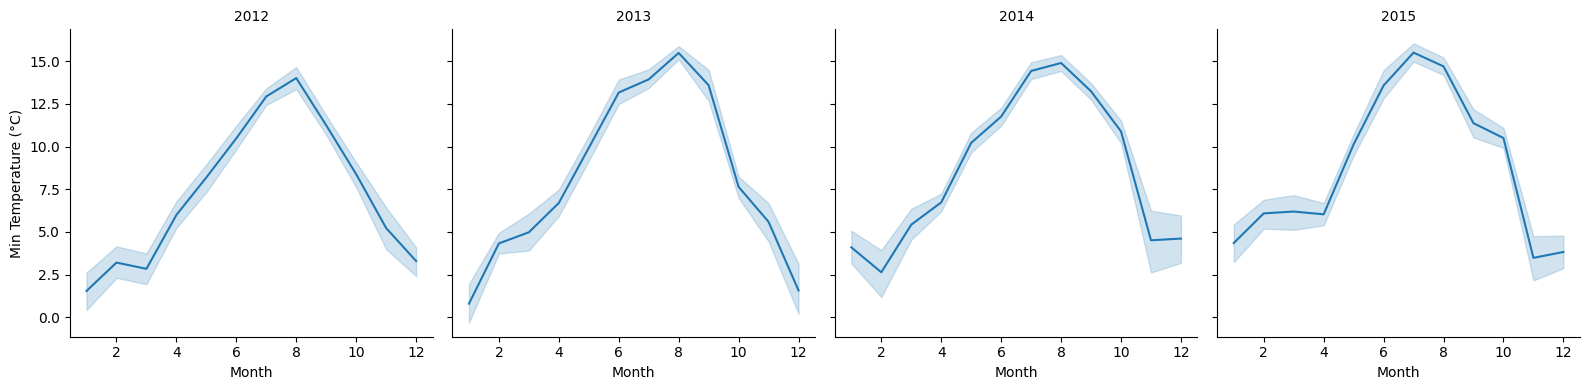

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

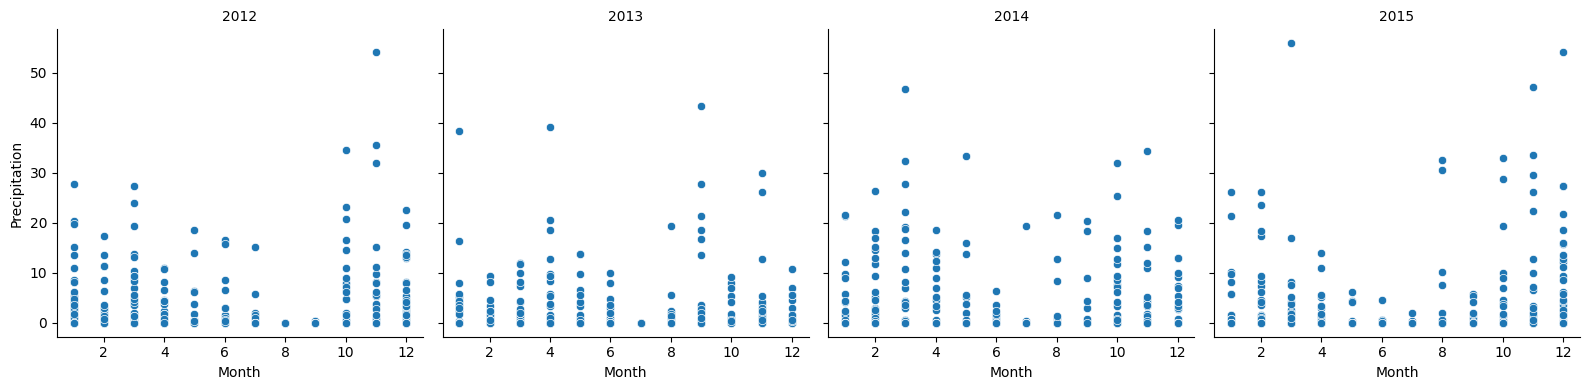

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

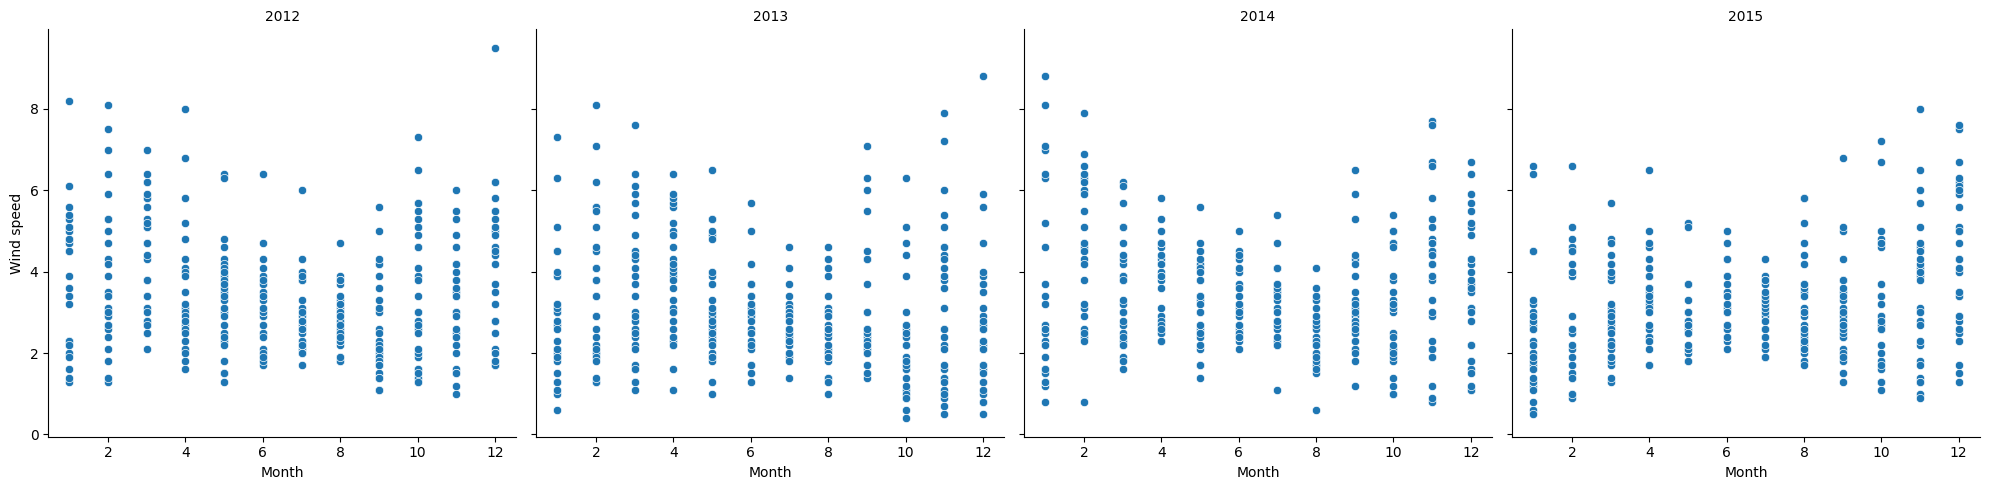

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [ ]:
df.weather.value_counts()

weather
2    641
4    640
1    101
0     53
3     26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

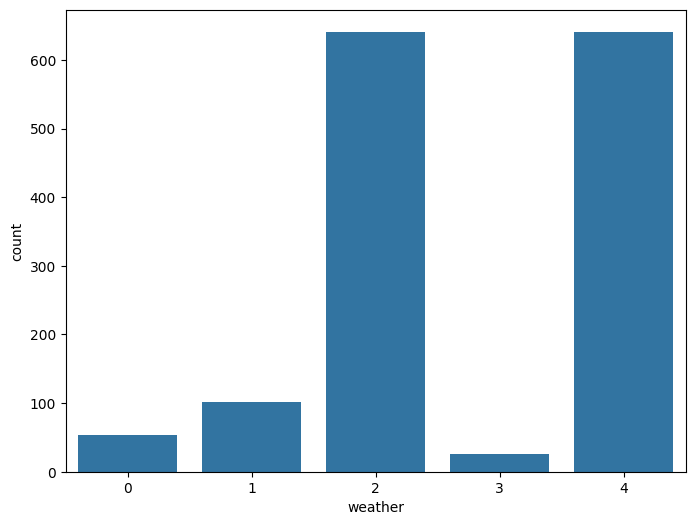

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x=df.weather)

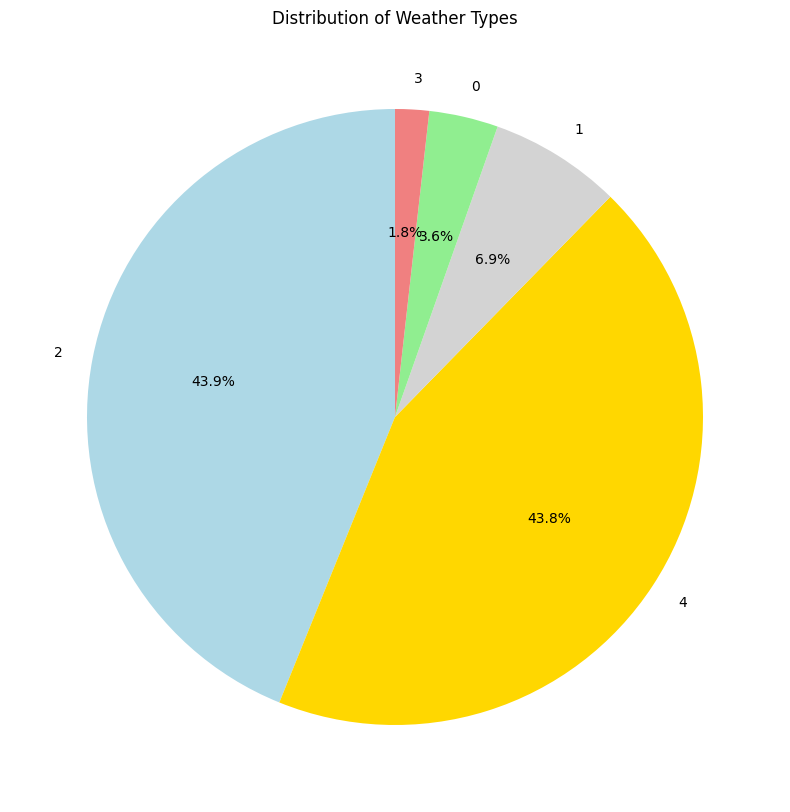

In [ ]:
x=df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

# **Unsupervised Learning Hierachical Cluster**

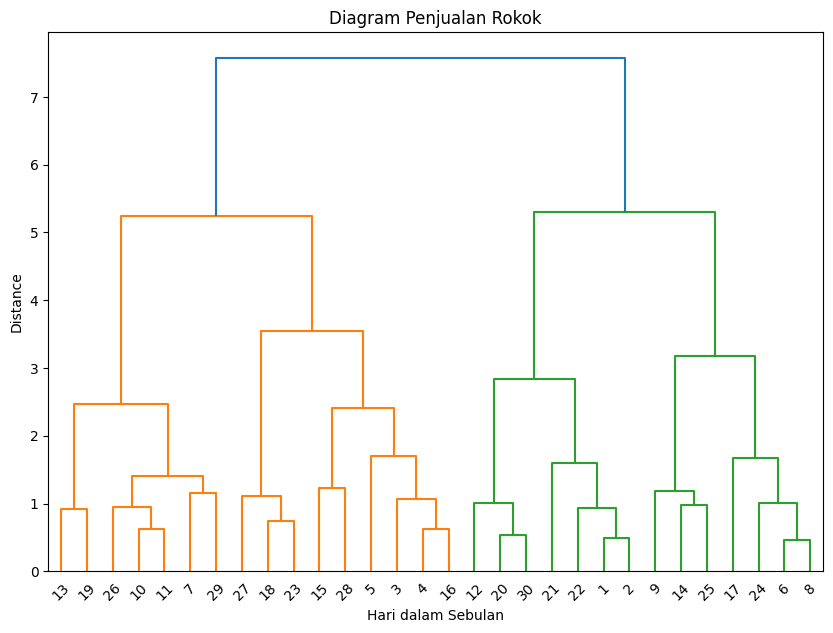

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Generate synthetic sales data
np.random.seed(42)
days = np.arange(1, 31)  # Days in a month
sales = np.random.randint(50, 200, size=(30, 3))  # Random sales data for 3 types of cigarettes

# Create a DataFrame
data = pd.DataFrame(sales, columns=['Djarum', 'Malboro', 'Surya'])
data['Day'] = days

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Djarum', 'Malboro', 'Surya']])

# Perform hierarchical/agglomerative clustering
Z = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['Day'].values)
plt.title('Diagram Penjualan Rokok')
plt.xlabel('Hari dalam Sebulan')
plt.ylabel('Distance')
plt.show()

In [2]:
# Determine clusters
max_d = 5  # Adjust this threshold to form clusters
clusters = fcluster(Z, max_d, criterion='distance')

data['Cluster'] = clusters

print("Cluster assignments:\n", data.head(10))

Cluster assignments:
    Djarum  Malboro  Surya  Day  Cluster
0     152      142     64    1        3
1     156      121     70    2        3
2     152      171    124    3        2
3     137      166    149    4        2
4     153      180    199    5        2
5     102       51    137    6        4
6      87      179     70    7        1
7     107       71    138    8        4
8      98      108     64    9        4
9     100      157    104   10        1


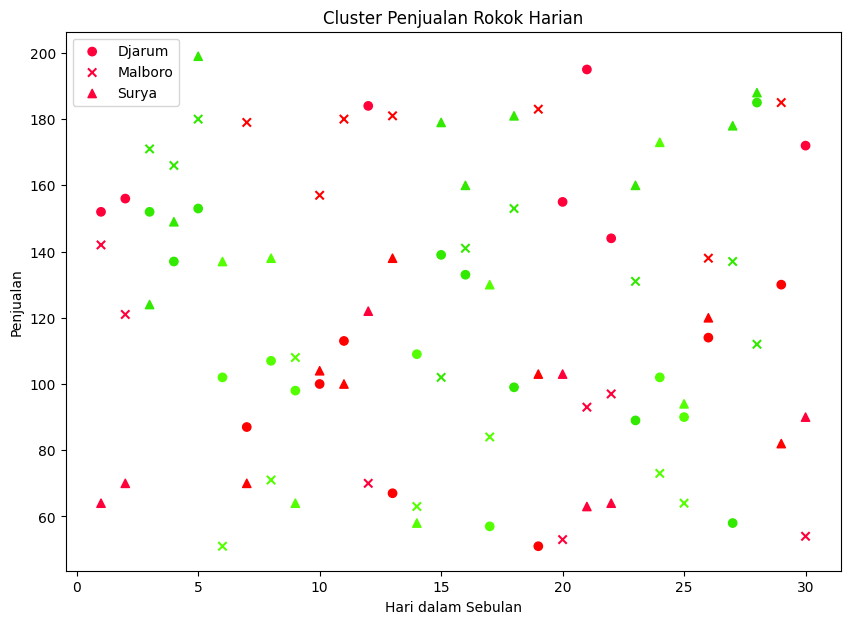

In [3]:
# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(data['Day'], data['Djarum'], c=data['Cluster'], cmap='prism', label='Djarum')
plt.scatter(data['Day'], data['Malboro'], c=data['Cluster'], cmap='prism', marker='x', label='Malboro')
plt.scatter(data['Day'], data['Surya'], c=data['Cluster'], cmap='prism', marker='^', label='Surya')
plt.title('Cluster Penjualan Rokok Harian')
plt.xlabel('Hari dalam Sebulan')
plt.ylabel('Penjualan')
plt.legend()
plt.show()